In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv("bt_train.csv")
train.head()

,x1,x2,label
0,55.808717,54.602061,0
1,50.882672,52.736342,0
2,53.196444,44.208365,0
3,54.727839,60.406845,0
4,49.771372,48.405605,0


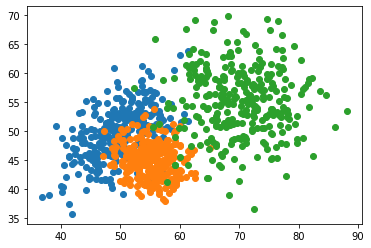

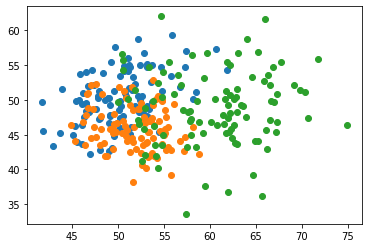

In [2]:
x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train==0])
plt.scatter(x1_train[y_train == 1], x2_train[y_train==1])
plt.scatter(x1_train[y_train == 2], x2_train[y_train==2])

plt.figure()
valid = pd.read_csv("bt_valid.csv")
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values

plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid==0])
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid==1])
plt.scatter(x1_valid[y_valid == 2], x2_valid[y_valid==2])

In [3]:
#Label = 0:
x1_train_label_0 = x1_train[y_train == 0]
x2_train_label_0 = x2_train[y_train == 0]
x1_valid_label_0 = x1_valid[y_valid == 0]
x2_valid_label_0 = x1_valid[y_valid == 0]

#Label = 1:
x1_train_label_1 = x1_train[y_train == 1]
x2_train_label_1 = x2_train[y_train == 1]
x1_valid_label_1 = x1_valid[y_valid == 1]
x2_valid_label_1 = x2_valid[y_valid == 1]

#Label = 2:
x1_train_label_2 = x1_train[y_train == 2]
x2_train_label_2 = x2_train[y_train == 2]
x1_valid_label_2 = x1_valid[y_valid == 2]
x2_valid_label_2 = x2_valid[y_valid == 2]

## Normalization

In [4]:
#Label = 0:

x1_mean_label0 = np.mean(x1_train_label_0)
x1_std_label0 = np.std(x1_train_label_0)
x2_mean_label0 = np.mean(x2_train_label_0)
x2_std_label0 = np.std(x2_train_label_0)

x1_train_label_0 = (x1_train_label_0 - x1_mean_label0)/ x1_std_label0
x2_train_label_0 = (x2_train_label_0 - x2_mean_label0)/ x2_std_label0

x1_valid_label_0 = (x1_valid_label_0 - x1_mean_label0)/ x1_std_label0
x2_valid_label_0 = (x2_valid_label_0 - x2_mean_label0)/ x2_std_label0


In [5]:
#Label = 1

x1_mean_label1 = np.mean(x1_train_label_1)
x1_std_label1 = np.std(x1_train_label_1)
x2_mean_label1 = np.mean(x2_train_label_1)
x2_std_label1 = np.std(x2_train_label_1)

x1_train_label_1 = (x1_train_label_1 - x1_mean_label1)/ x1_std_label1
x2_train_label_1 = (x2_train_label_1 - x2_mean_label1)/ x2_std_label1

x1_valid_label_1 = (x1_valid_label_1 - x1_mean_label1)/ x1_std_label1
x2_valid_label_1 = (x2_valid_label_1 - x2_mean_label1)/ x2_std_label1

In [6]:
#Label = 2

x1_mean_label2 = np.mean(x1_train_label_2)
x1_std_label2 = np.std(x1_train_label_2)
x2_mean_label2 = np.mean(x2_train_label_2)
x2_std_label2 = np.std(x2_train_label_2)

x1_train_label_2 = (x1_train_label_2 - x1_mean_label2)/ x1_std_label2
x2_train_label_2 = (x2_train_label_2 - x2_mean_label2)/ x2_std_label2

x1_valid_label_2 = (x1_valid_label_2 - x1_mean_label2)/ x1_std_label2
x2_valid_label_2 = (x2_valid_label_2 - x2_mean_label2)/ x2_std_label2

In [7]:
import numpy as np

y_train_label_0 = []
for i in y_train:
  if i == 0:
    y_train_label_0.append(i)
  

y_train_label_0 = np.array(y_train_label_0)
print(type(y_train_label_0))

y_valid_label_0 = []
for i in y_valid:
  if i == 0:
    y_valid_label_0.append(i)
y_valid_label_0 = np.array(y_valid_label_0)    
print(type(y_valid_label_0))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
y_train_label_0.shape

(300,)

In [9]:
#Label = 0

theta1, theta2, theta3 = 0.0, 0.0, 0.0
lrn_rate = 0.000001
n_iters = 300000

best_theta = None      #biến để lưu tham số mà có accuracy tốt nhất trên tập valid
best_val_acc = -1.0

for ii in range(n_iters):
    exppp = np.exp(-theta1*x1_train_label_0 -theta2*x2_train_label_0-theta3)
    common = exppp*(1/(1+exppp) - y_train_label_0/exppp)
    dL_dtheta1 = np.mean(common*(-x1_train_label_0))
    dL_dtheta2 = np.mean(common*(-x2_train_label_0))
    dL_dtheta3 = np.mean(common*(-1))
    theta1 = theta1 - lrn_rate * dL_dtheta1
    theta2 = theta2 - lrn_rate * dL_dtheta2
    theta3 = theta3 - lrn_rate * dL_dtheta3
    
    if ii % 10000 == 0:
        ## predict
        pred_proba_train = 1/(1+np.exp(-theta1*x1_train_label_0-theta2*x2_train_label_0-theta3))            ## xác suất label 0
        train_loss = np.mean(-(1-y_train_label_0)*np.log(pred_proba_train) - y_train_label_0*np.log(1-pred_proba_train))
        train_acc = np.mean(y_train_label_0 == (pred_proba_train < 0.5).astype(int))                ## convert xác suất đoán đc ra nhãn rồi tính accuracy
        
        
        pred_proba_valid = 1/(1+np.exp(-theta1*x1_valid_label_0-theta2*x2_valid_label_0-theta3))
        valid_loss = np.mean(-(1-y_valid_label_0)*np.log(pred_proba_valid) - y_valid_label_0*np.log(1-pred_proba_valid))
        valid_acc = np.mean(y_valid_label_0 == (pred_proba_valid < 0.5).astype(int))
        
        if valid_acc > best_val_acc:
            ## lưu tham số tốt nhất
            best_val_acc = valid_acc
            best_theta = theta1, theta2, theta3
        
        print("Iter {} - loss {:.4f} - acc {:.4f} - val_loss {:.4f} - val_acc {:.4f}".format(ii, train_loss, train_acc, valid_loss, valid_acc))

theta1, theta2, theta3 = best_theta
train_acc = np.mean(y_train_label_0 == (1/(1+np.exp(-theta1*x1_train_label_0-theta2*x2_train_label_0-theta3)) < 0.5).astype(int))
valid_acc = np.mean(y_valid_label_0 == (1/(1+np.exp(-theta1*x1_valid_label_0-theta2*x2_valid_label_0-theta3)) < 0.5).astype(int))
print("Accuracy on train: ", train_acc)
print("Accuracy on valid: ", valid_acc)

Iter 0 - loss 0.6931 - acc 1.0000 - val_loss 0.6931 - val_acc 1.0000
Iter 10000 - loss 0.6907 - acc 1.0000 - val_loss 0.6907 - val_acc 1.0000
Iter 20000 - loss 0.6882 - acc 1.0000 - val_loss 0.6882 - val_acc 1.0000
Iter 30000 - loss 0.6857 - acc 1.0000 - val_loss 0.6857 - val_acc 1.0000
Iter 40000 - loss 0.6832 - acc 1.0000 - val_loss 0.6832 - val_acc 1.0000
Iter 50000 - loss 0.6808 - acc 1.0000 - val_loss 0.6808 - val_acc 1.0000
Iter 60000 - loss 0.6784 - acc 1.0000 - val_loss 0.6784 - val_acc 1.0000
Iter 70000 - loss 0.6759 - acc 1.0000 - val_loss 0.6759 - val_acc 1.0000
Iter 80000 - loss 0.6735 - acc 1.0000 - val_loss 0.6735 - val_acc 1.0000
Iter 90000 - loss 0.6711 - acc 1.0000 - val_loss 0.6711 - val_acc 1.0000
Iter 100000 - loss 0.6688 - acc 1.0000 - val_loss 0.6688 - val_acc 1.0000
Iter 110000 - loss 0.6664 - acc 1.0000 - val_loss 0.6664 - val_acc 1.0000
Iter 120000 - loss 0.6640 - acc 1.0000 - val_loss 0.6640 - val_acc 1.0000
Iter 130000 - loss 0.6617 - acc 1.0000 - val_loss 0.

In [ ]:
print(X_train.shape)
print(y_train_label_0.shape)

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = np.concatenate([x1_train_label_0.reshape(-1,1), x2_train_label_0.reshape(-1,1)], axis=-1)
X_valid = np.concatenate([x1_valid_label_0.reshape(-1,1), x2_valid_label_0.reshape(-1,1)], axis=-1)

lr = LogisticRegression().fit(X_train, y_train_label_0)
print("Sklearn accuracy on train: ", np.mean(y_train_label_0 == lr.predict(X_train)))
print("Sklearn accuracy on valid: ", np.mean(y_valid_label_0 == lr.predict(X_valid)))

ValueError: ignored

In [ ]:
y_train.shape

In [ ]:
#Label = 1:

theta1, theta2, theta3 = 0.0, 0.0, 0.0
lrn_rate = 0.001
n_iters = 300000

best_theta = None      #biến để lưu tham số mà có accuracy tốt nhất trên tập valid
best_val_acc = -1.0

for ii in range(n_iters):
    exppp = np.exp(-theta1*x1_train -theta2*x2_train-theta3)
    common = exppp*(1/(1+exppp) - y_train/exppp)
    dL_dtheta1 = np.mean(common*(-x1_train))
    dL_dtheta2 = np.mean(common*(-x2_train))
    dL_dtheta3 = np.mean(common*(-1))
    theta1 = theta1 - lrn_rate * dL_dtheta1
    theta2 = theta2 - lrn_rate * dL_dtheta2
    theta3 = theta3 - lrn_rate * dL_dtheta3
    
    if ii % 10000 == 0:
        ## predict
        pred_proba_train = 1/(1+np.exp(-theta1*x1_train-theta2*x2_train-theta3))            ## xác suất label 0
        train_loss = np.mean(-(1-y_train)*np.log(pred_proba_train) - y_train*np.log(1-pred_proba_train))
        train_acc = np.mean(y_train == (pred_proba_train < 0.5).astype(int))                ## convert xác suất đoán đc ra nhãn rồi tính accuracy
        
        
        pred_proba_valid = 1/(1+np.exp(-theta1*x1_valid-theta2*x2_valid-theta3))
        valid_loss = np.mean(-(1-y_valid)*np.log(pred_proba_valid) - y_valid*np.log(1-pred_proba_valid))
        valid_acc = np.mean(y_valid == (pred_proba_valid < 0.5).astype(int))
        
        if valid_acc > best_val_acc:
            ## lưu tham số tốt nhất
            best_val_acc = valid_acc
            best_theta = theta1, theta2, theta3
        
        print("Iter {} - loss {:.4f} - acc {:.4f} - val_loss {:.4f} - val_acc {:.4f}".format(ii, train_loss, train_acc, valid_loss, valid_acc))

theta1, theta2, theta3 = best_theta
train_acc = np.mean(y_train == (1/(1+np.exp(-theta1*x1_train-theta2*x2_train-theta3)) < 0.5).astype(int))
valid_acc = np.mean(y_valid == (1/(1+np.exp(-theta1*x1_valid-theta2*x2_valid-theta3)) < 0.5).astype(int))
print("Accuracy on train: ", train_acc)
print("Accuracy on valid: ", valid_acc)

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = np.concatenate([x1_train.reshape(-1,1), x2_train.reshape(-1,1)], axis=-1)
X_valid = np.concatenate([x1_valid.reshape(-1,1), x2_valid.reshape(-1,1)], axis=-1)

lr = LogisticRegression().fit(X_train, y_train)
print("Sklearn accuracy on train: ", np.mean(y_train == lr.predict(X_train)))
print("Sklearn accuracy on valid: ", np.mean(y_valid == lr.predict(X_valid)))

In [ ]:
#Label = 2

theta1, theta2, theta3 = 0.0, 0.0, 0.0
lrn_rate = 0.001
n_iters = 300000

best_theta = None      #biến để lưu tham số mà có accuracy tốt nhất trên tập valid
best_val_acc = -1.0

for ii in range(n_iters):
    exppp = np.exp(-theta1*x1_train -theta2*x2_train-theta3)
    common = exppp*(1/(1+exppp) - y_train/exppp)
    dL_dtheta1 = np.mean(common*(-x1_train))
    dL_dtheta2 = np.mean(common*(-x2_train))
    dL_dtheta3 = np.mean(common*(-1))
    theta1 = theta1 - lrn_rate * dL_dtheta1
    theta2 = theta2 - lrn_rate * dL_dtheta2
    theta3 = theta3 - lrn_rate * dL_dtheta3
    
    if ii % 10000 == 0:
        ## predict
        pred_proba_train = 1/(1+np.exp(-theta1*x1_train-theta2*x2_train-theta3))            ## xác suất label 0
        train_loss = np.mean(-(1-y_train)*np.log(pred_proba_train) - y_train*np.log(1-pred_proba_train))
        train_acc = np.mean(y_train == (pred_proba_train < 0.5).astype(int))                ## convert xác suất đoán đc ra nhãn rồi tính accuracy
        
        
        pred_proba_valid = 1/(1+np.exp(-theta1*x1_valid-theta2*x2_valid-theta3))
        valid_loss = np.mean(-(1-y_valid)*np.log(pred_proba_valid) - y_valid*np.log(1-pred_proba_valid))
        valid_acc = np.mean(y_valid == (pred_proba_valid < 0.5).astype(int))
        
        if valid_acc > best_val_acc:
            ## lưu tham số tốt nhất
            best_val_acc = valid_acc
            best_theta = theta1, theta2, theta3
        
        print("Iter {} - loss {:.4f} - acc {:.4f} - val_loss {:.4f} - val_acc {:.4f}".format(ii, train_loss, train_acc, valid_loss, valid_acc))

theta1, theta2, theta3 = best_theta
train_acc = np.mean(y_train == (1/(1+np.exp(-theta1*x1_train-theta2*x2_train-theta3)) < 0.5).astype(int))
valid_acc = np.mean(y_valid == (1/(1+np.exp(-theta1*x1_valid-theta2*x2_valid-theta3)) < 0.5).astype(int))
print("Accuracy on train: ", train_acc)
print("Accuracy on valid: ", valid_acc)

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = np.concatenate([x1_train.reshape(-1,1), x2_train.reshape(-1,1)], axis=-1)
X_valid = np.concatenate([x1_valid.reshape(-1,1), x2_valid.reshape(-1,1)], axis=-1)

lr = LogisticRegression().fit(X_train, y_train)
print("Sklearn accuracy on train: ", np.mean(y_train == lr.predict(X_train)))
print("Sklearn accuracy on valid: ", np.mean(y_valid == lr.predict(X_valid)))